# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Glend Aldo Marcelino
- Email:glendmarcel474@gmail.com
- Id Dicoding:glendam

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : pada musim dan cuaca yang bagaimanakah orang-orang menyewa sepeda
- pertanyaan 2 : pada jam-jam berapa sajakah orang-orang menyewa sepeda
- pertanyaan 3 : Berapa banyak orang yang menyewa sepeda dari tahun 2011-2012

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/glendod/data-analysis-project/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/glendod/data-analysis-project/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

 1. Menilai tabel **day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


berdasarkan kode di atas, terdapat kesalahan tipe data pada kolom dteday

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan kode di atas, tidak terdapat missing value

In [6]:
print("jumlah duplikat :", day_df.duplicated().sum())

jumlah duplikat : 0


berdasarkan kode di atas, tidak terdapat data yang duplikat

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


berdasarkan kode di atas, tidak terdapat inccurate value

2. Menilai tabel **hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


berdasarkan kode di atas, terdapat kesalahan tipe data pada kolom dteday

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan kode di atas, tidak terdapat missing value

In [10]:
print("jumlah duplikat :", hour_df.duplicated().sum())

jumlah duplikat : 0


berdasarkan kode di atas, tidak terdapat data yang duplikat

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


berdasarkan kode di atas, tidak terdapat inccurate value

### Cleaning Data

1. membersihkan data day_df (mengubah tipe data pada kolom dteday)

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. membersihkan data hour_df (mengubah tipe data pada kolom dteday)

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
hour_df.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


melihat berapa banyak orang yang menyewa sepeda berdasarkan musim dan cuaca

In [18]:
hour_df.groupby(['season', 'weathersit'])['cnt'].sum().reset_index()

,season,weathersit,cnt
0,1,1,325278
1,1,2,124205
2,1,3,21642
3,1,4,223
4,2,1,664463
5,2,2,207363
6,2,3,46763
7,3,1,801941
8,3,2,212932
9,3,3,46256


melihat berapa banyak user casual dan registered yang menyewa sepeda berdasarkan musim dan cuaca

In [19]:
result_by_users_type = hour_df.groupby(['season', 'weathersit']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

result_by_users_type

,season,weathersit,casual,registered,cnt
0,1,1,44462,280816,325278
1,1,2,14760,109445,124205
2,1,3,1392,20250,21642
3,1,4,8,215,223
4,2,1,151197,513266,664463
5,2,2,44912,162451,207363
6,2,3,7413,39350,46763
7,3,1,174014,627927,801941
8,3,2,42350,170582,212932
9,3,3,9727,36529,46256


melihat berapa banyak orang yang menyewa sepeda berdasarkan jam

In [20]:
hour_df.groupby(['hr'])['cnt'].sum().reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


melihat berapa banyak orang yang menyewa sepeda berdasarkan hari

In [21]:
hour_df.groupby(['weekday'])['cnt'].sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


melihat berapa banyak orang yang menyewa sepeda berdasarkan tahun

In [22]:
hour_df.groupby(['yr'])['cnt'].sum().reset_index()

,yr,cnt
0,0,1243103
1,1,2049576


melihat berapa banyak orang yang menyewa sepeda berdasarkan bulan

In [23]:
hour_df.groupby(['mnth'])['cnt'].sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


## Visualization & Explanatory Analysis

### Pertanyaan 1: pada musim dan cuaca yang bagaimanakah mayoritas orang menyewa sepeda

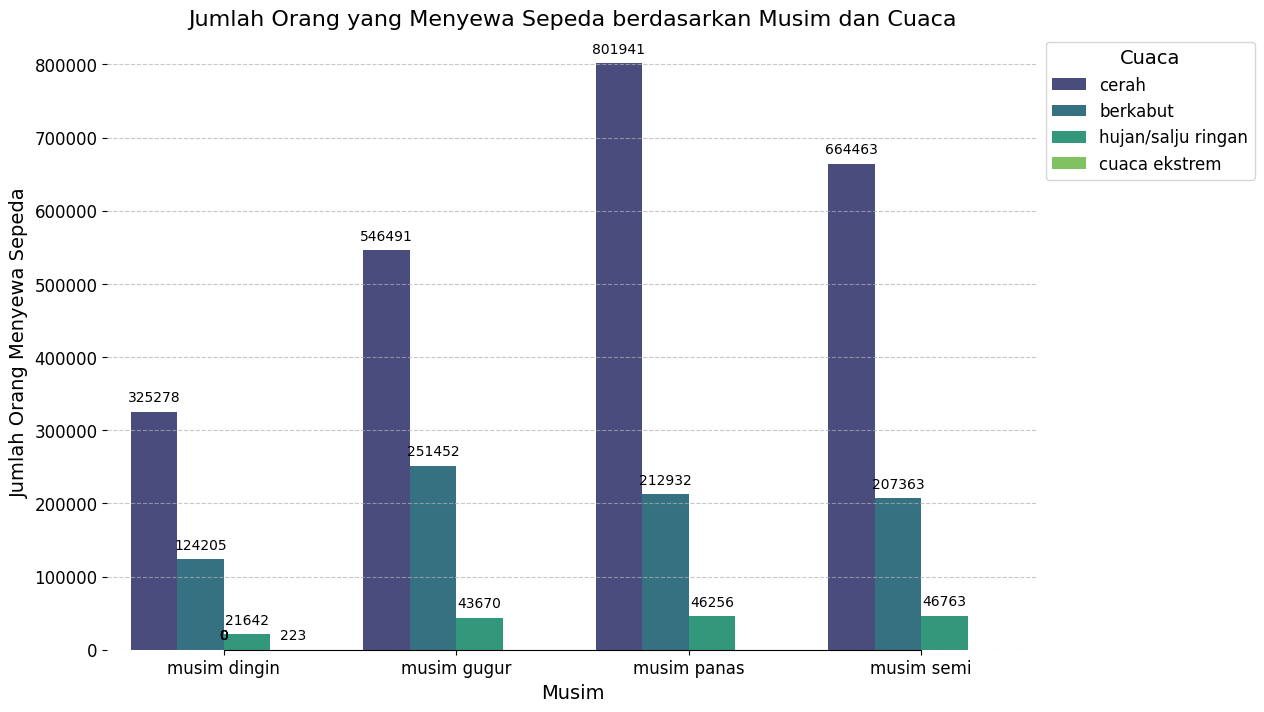

In [24]:
hour_df['season'] = hour_df['season'].replace({1:"musim dingin", 2:"musim semi", 3:"musim panas", 4:"musim gugur"})

hour_df['weathersit'] = hour_df['weathersit'].replace({1:"cerah", 2:"berkabut", 3:"hujan/salju ringan", 4:"cuaca ekstrem"})

data_by_season_weather = hour_df.groupby(['season', 'weathersit'])['cnt'].sum().reset_index()

weather_order = ['cerah', 'berkabut', 'hujan/salju ringan', 'cuaca ekstrem']

palette = sns.color_palette("viridis", len(data_by_season_weather['weathersit'].unique()))

plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='cnt', hue='weathersit', data=data_by_season_weather, palette=palette, hue_order=weather_order)
plt.title('Jumlah Orang yang Menyewa Sepeda berdasarkan Musim dan Cuaca', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Orang Menyewa Sepeda', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cuaca', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

for p in plt.gca().patches:
    if not pd.isna(p.get_height()):
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

### Pertanyaan 2: pada jam-jam berapa sajakah mayoritas orang menyewa sepeda

C:\Users\Glend\AppData\Local\Temp\ipykernel_5836\4285751657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt', y='hr', data=data_by_hour, orient='h', palette="viridis")


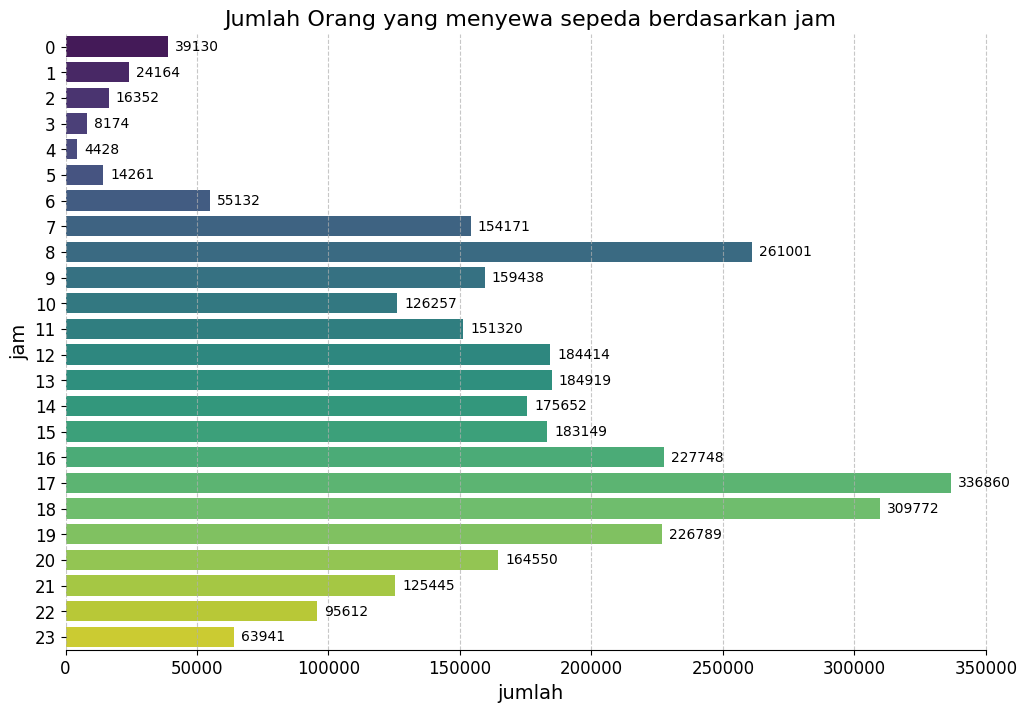

In [25]:
data_by_hour = hour_df.groupby(['hr'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='cnt', y='hr', data=data_by_hour, orient='h', palette="viridis")
plt.title('Jumlah Orang yang menyewa sepeda berdasarkan jam', fontsize=16)
plt.xlabel('jumlah', fontsize=14)
plt.ylabel('jam', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.show()

### pertanyaan 3 : Berapa banyak orang yang menyewa sepeda dari tahun 2011-2012

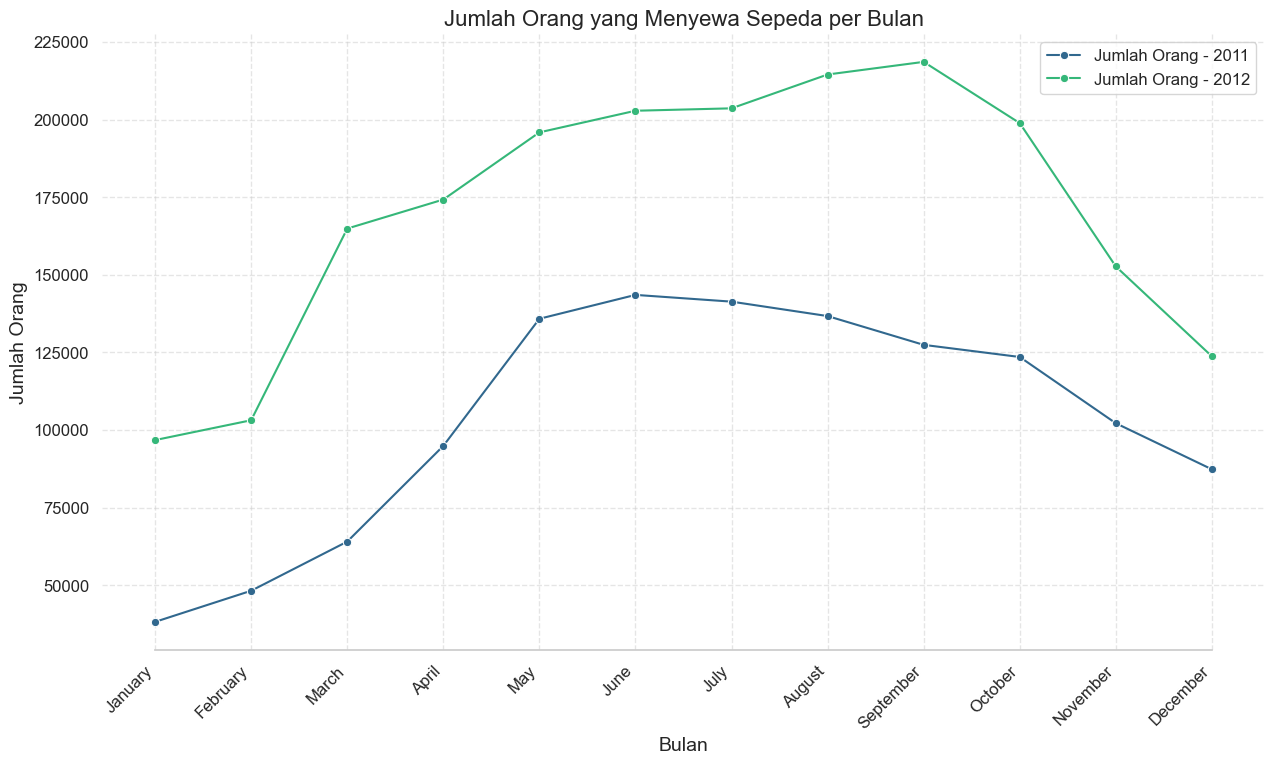

In [26]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

data_by_month = hour_df.groupby(hour_df['dteday'].dt.to_period("M")).agg({'cnt': 'sum'}).reset_index()

data_by_month['month'] = data_by_month['dteday'].dt.strftime('%B')

sns.set(style="whitegrid")

palette = sns.color_palette("viridis", n_colors=len(data_by_month['dteday'].dt.year.unique()))

plt.figure(figsize=(15, 8))
for i, year in enumerate(data_by_month['dteday'].dt.year.unique()):
    data_by_year = data_by_month[data_by_month['dteday'].dt.year == year]
    sns.lineplot(x='month', y='cnt', data=data_by_year, marker='o', label=f'Jumlah Orang - {year}', color=palette[i])

plt.title('Jumlah Orang yang Menyewa Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Orang', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine(trim=True, left=True)

plt.show()

## Conclusion

- Conclution pertanyaan 1 : berdasarkan visulisasi data di atas dapat kita simpulkan bahwa kebanyakan orang menyewa sepeda pada musim panas di cuaca yang cerah

- conclution pertanyaan 2 : berdasarkan visulisasi data di atas dapat kita simpulkan bahwa kebanyakan orang menyewa sepeda di jam 17 dan juga jam 18, serta jam 8 pagi

- coclution pertanyaan 3 : berdasarkan visualisasi data di atas dapat kita simpulkan bahwa pada tahun 2012 orang-orang lebih banyak menyewa sepeda daripada tahun 2011